DataFrame loaded successfully.


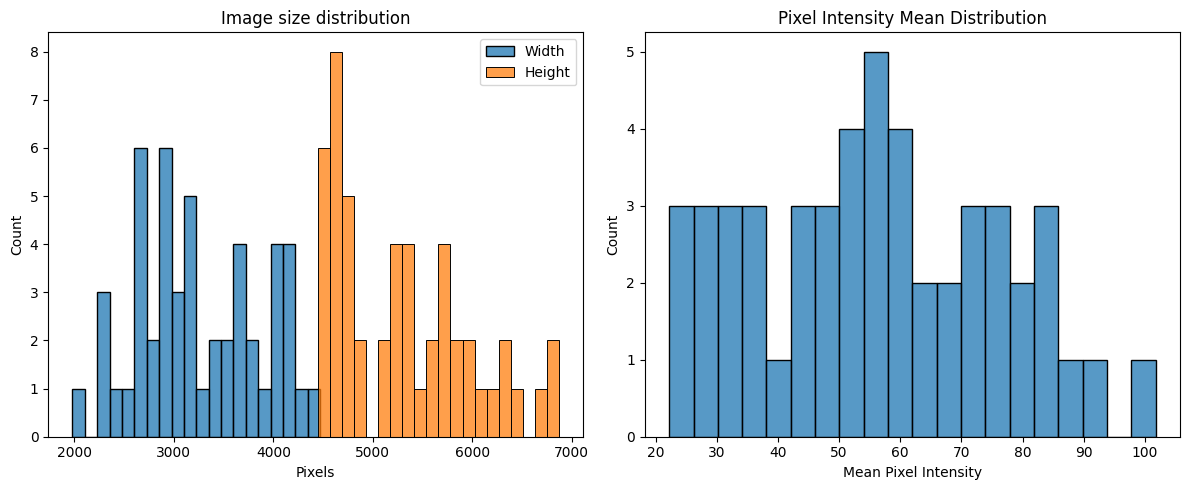

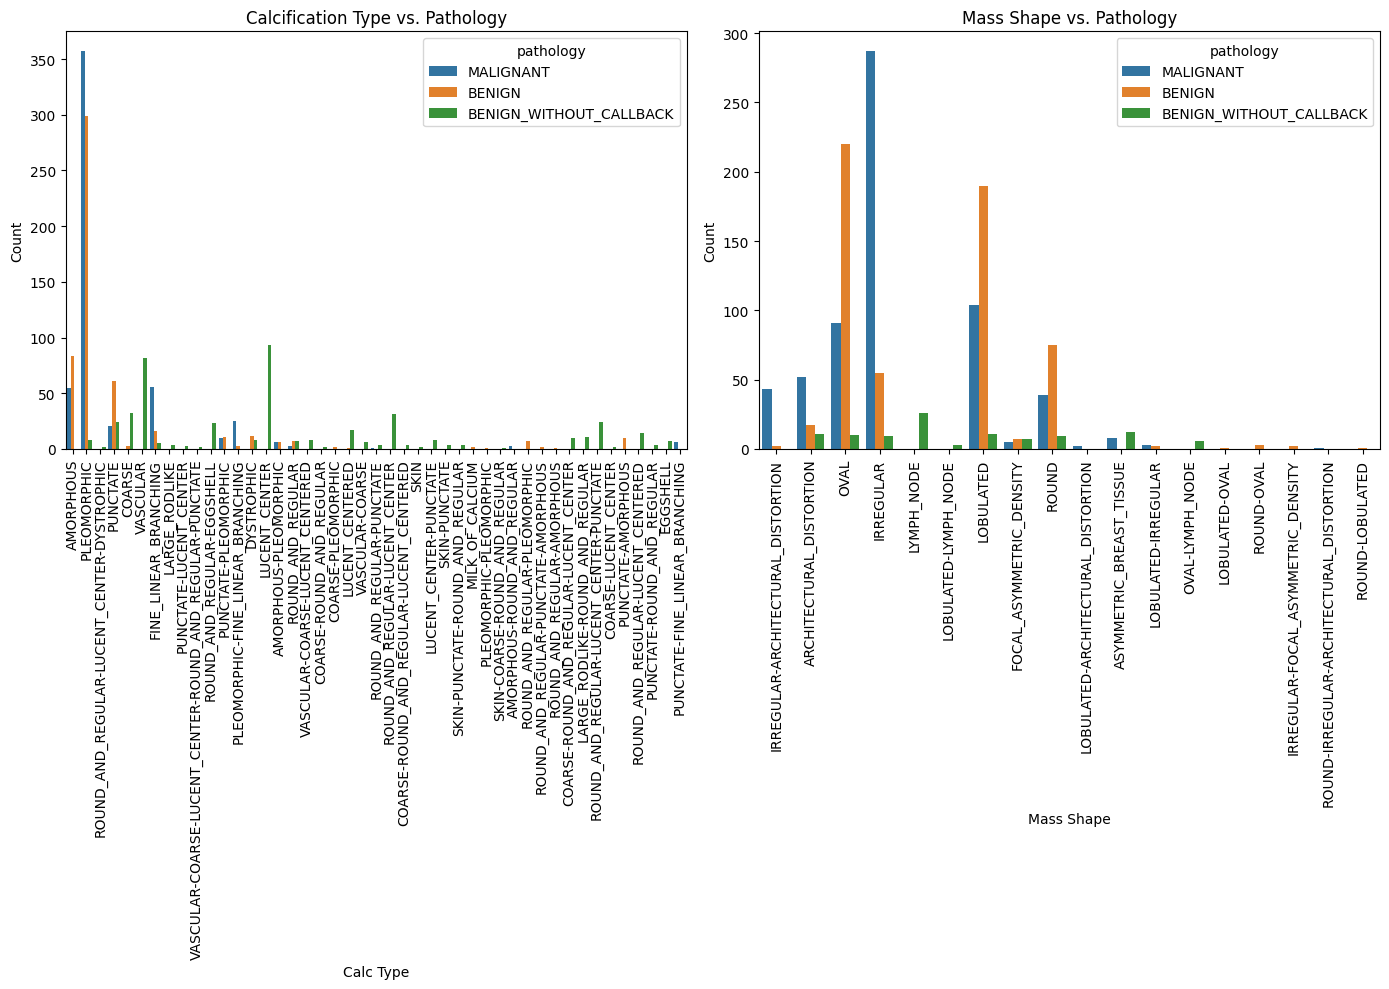

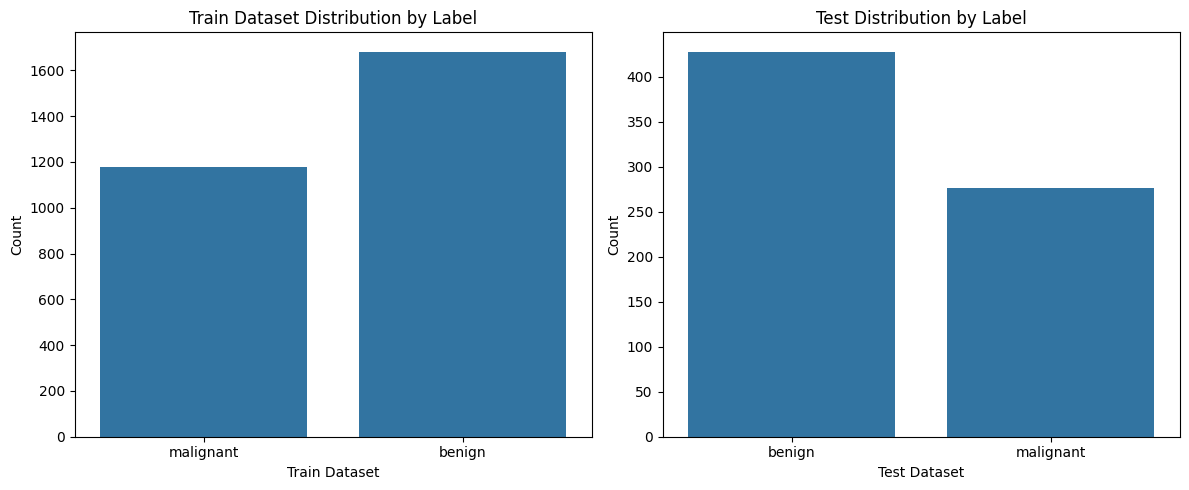

In [4]:
# In visualization.ipynb, at the beginning
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import PIL.Image as Image
import pandas as pd

#loading paths
BASE_DIR = os.getenv('CBIS_DDSM_PATH', r'C:\Users\aryan\OneDrive\Desktop\DATASET')
if not os.path.exists(BASE_DIR):
    raise FileNotFoundError(f"Dataset directory {BASE_DIR} does not exist")
csv_dir = os.path.join(BASE_DIR, 'csv')
if not os.path.exists(csv_dir):
    raise FileNotFoundError(f"CSV file {csv_dir} does not exist")

calc_train_path = os.path.join(csv_dir, 'calc_case_description_train_set.csv')
mass_train_path = os.path.join(csv_dir, 'mass_case_description_train_set.csv')

calc_train_df = pd.read_csv(calc_train_path)
mass_train_df = pd.read_csv(mass_train_path)

# Load the processed dataframe from the CSV files

BASE_DIR = r'C:\Users\aryan\OneDrive\Desktop\hopescan_project\data'
train_df = pd.read_csv(f'{BASE_DIR}/processed_train_data.csv')
test_df = pd.read_csv(f'{BASE_DIR}/processed_test_data.csv')

print("DataFrame loaded successfully.")

#Image size and pixel stats

sample_images = train_df['image_path'].sample(50, random_state=42)
image_sizes = []
pixel_means = []
for image_path in sample_images:
    try:
        img = Image.open(image_path).convert('L')
        image_sizes.append(img.size)
        pixel_means.append(np.array(img).mean())
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot([s[0] for s in image_sizes], bins = 20, label = 'Width')
sns.histplot([s[1] for s in image_sizes], bins = 20, label = 'Height')
plt.title('Image size distribution')
plt.xlabel('Pixels')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(pixel_means, bins = 20)
plt.title('Pixel Intensity Mean Distribution')
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#Pathology vs calcification/mass shape

plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
sns.countplot(data=calc_train_df, x='calc type', hue='pathology')
plt.title("Calcification Type vs. Pathology")
plt.xlabel("Calc Type")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=mass_train_df, x='mass shape', hue='pathology')
plt.title("Mass Shape vs. Pathology")
plt.xlabel("Mass Shape")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Train vs Test distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x='label')
plt.title("Train Dataset Distribution by Label")
plt.xlabel("Train Dataset")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(data=test_df, x='label')
plt.title("Test Distribution by Label")
plt.xlabel("Test Dataset")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
